In [1]:
import os
os.chdir("/gpfs/home/asun/jin_lab/perturbench/0_datasets")
print(os.getcwd())

import sys
sys.path.append(os.path.abspath('..'))


/gpfs/group/jin/asun/perturbench/0_datasets


In [2]:
import scanpy as sc

In [4]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

# Boli

In [11]:
boli = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/boli_ctx.h5ad')
boli

AnnData object with n_obs × n_vars = 35527 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'Assign', 'scds', 'cxds', 'bcds', 'Sample', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'CT', 'mito', 'BioSamp', 'CT2', 'ForPlot', 'Remove', 'active_ident'
    var: 'variable_gene'

In [12]:
# Store the current index (gene names) into a new column called 'gene_name'
boli.var['gene_name'] = boli.var.index

# Optionally reset the index if you want to replace it with default integers
boli.var.reset_index(drop=True, inplace=True)

In [13]:
boli.obs['Assign'].value_counts()

Assign
Bcl11b_0    5367
Trio_0      4274
Dab1_0      4123
Tbr1_0      3466
NT_0        2735
Rb1cc1_0    2534
Satb2_0     2320
Herc1_0     2165
NT_1        1979
Ank3_0      1763
Xpo7_0      1602
Cx3cl1_0    1392
Cul1_0      1297
ST_0         307
ST_1         203
Name: count, dtype: int64

In [14]:
def clean_assign(val):
    if val in {'NT_0'}:
        return 'ctrl'
    else:
        return val.replace('_0', '').capitalize()

boli.obs['Assign_clean'] = boli.obs['Assign'].apply(clean_assign)

to_remove = ['Nt_1', 'St', 'St_1']
boli = boli[~boli.obs['Assign_clean'].isin(to_remove)].copy()

/gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [15]:
boli.obs['condition'] = boli.obs['Assign_clean'].apply(
    lambda x: x if x == 'ctrl' else f"{x.split('+')[0].upper()}+ctrl"
)

In [16]:
boli.obs['condition'].value_counts()

condition
BCL11B+ctrl    5367
TRIO+ctrl      4274
DAB1+ctrl      4123
TBR1+ctrl      3466
ctrl           2735
RB1CC1+ctrl    2534
SATB2+ctrl     2320
HERC1+ctrl     2165
ANK3+ctrl      1763
XPO7+ctrl      1602
CX3CL1+ctrl    1392
CUL1+ctrl      1297
Name: count, dtype: int64

In [17]:
print(boli.obs['predicted.subclass'].value_counts())

predicted.subclass
L6 CT CTX        7860
L4/5 IT CTX      3761
L5 PT CTX        3710
L2/3 IT CTX-1    3122
L5 NP CTX        2755
L6 IT CTX        2544
L5 IT CTX        1939
CT SUB           1689
Pvalb            1317
L2/3 IT CTX-2    1120
Sst               838
NP SUB            468
L3 RSP-ACA        370
L6b CTX           367
L2/3 IT PPP       356
L5 IT TPE-ENT     172
L5 PPP            155
Vip               116
Lamp5             111
Oligo              52
Sncg               51
SUB-ProS           33
Car3               30
Astro              29
NP PPP             26
CR                 14
Micro-PVM           9
L2 IT RHP           7
Endo                6
SMC-Peri            5
VLMC                2
L2 IT ENTl          1
L6 IT ENTl          1
L6b/CT ENT          1
V3d                 1
Name: count, dtype: int64


In [18]:
print(boli.obs['predicted.subclass'].nunique())

35


In [19]:
after = np.array(boli.X.sum(axis=1)).flatten()
print("\nPer-cell total counts (after):")
print("min =", after.min(), " median =", np.median(after), " max =", after.max())


Per-cell total counts (after):
min = 502.0  median = 6461.0  max = 29953.0


In [20]:
sc.pp.normalize_total(boli)
after = np.array(boli.X.sum(axis=1)).flatten()
print("\nPer-cell total counts (after):")
print("min =", after.min(), " median =", np.median(after), " max =", after.max())


Per-cell total counts (after):
min = 6460.9985  median = 6461.0  max = 6461.0015


In [30]:
sc.pp.normalize_total(boli)
sc.pp.log1p(boli)
sc.pp.highly_variable_genes(boli,n_top_genes=5000, subset=True)

In [33]:
boli

AnnData object with n_obs × n_vars = 33038 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'Assign', 'scds', 'cxds', 'bcds', 'Sample', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'CT', 'mito', 'BioSamp', 'CT2', 'ForPlot', 'Remove', 'active_ident', 'Assign_clean', 'condition'
    var: 'variable_gene', 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
boli.write("boli_ctx_scprocess.h5ad")

# Boli Processed

In [3]:
boli = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/boli_ctx_scprocess_no+ctrl.h5ad')


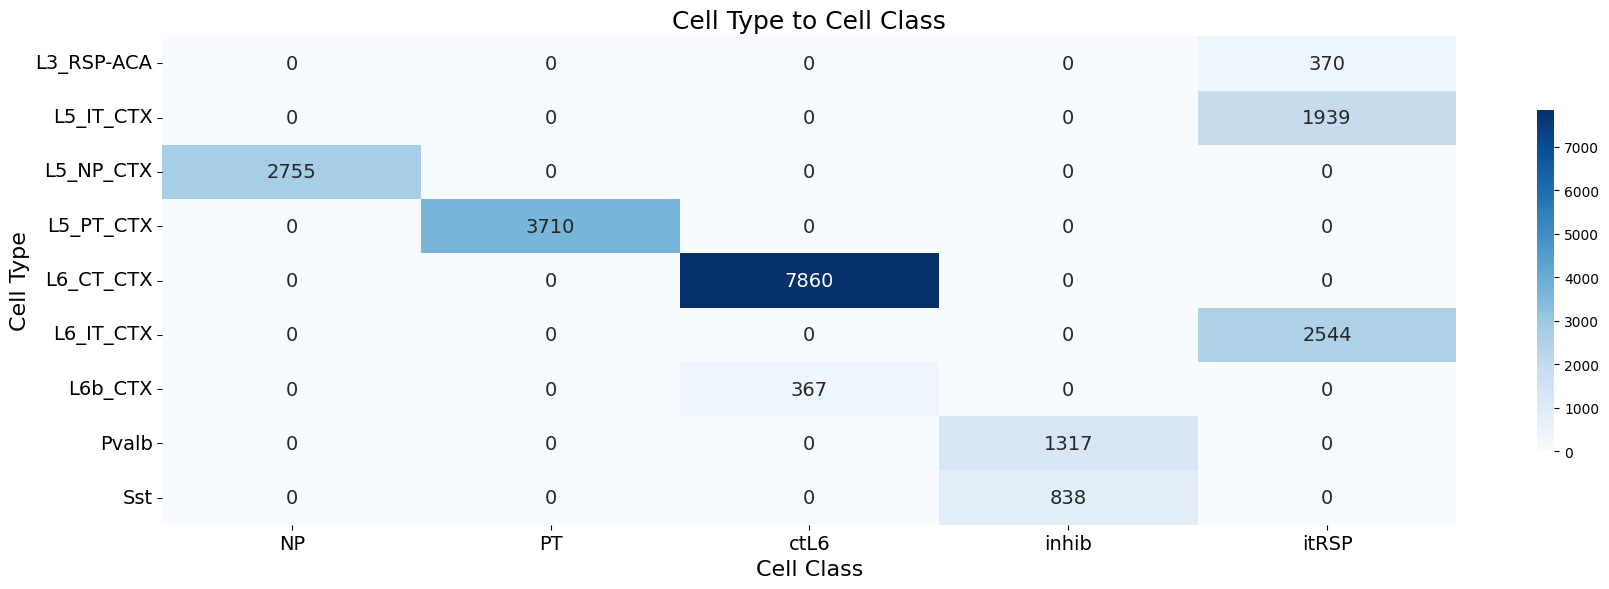

In [7]:
import seaborn as sns

conf_matrix = pd.crosstab(boli.obs["cell_type"], boli.obs["cell_class"])

plt.figure(figsize=(18, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    annot_kws={"fontsize": 14},  # larger annotation text
    cbar_kws={"shrink": 0.7}
)
plt.xlabel("Cell Class", fontsize=16)
plt.ylabel("Cell Type", fontsize=16)
plt.title("Cell Type to Cell Class", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
sc.pp.pca(boli, n_comps = 50)
sc.pp.neighbors(boli)
sc.tl.umap(boli)


/gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


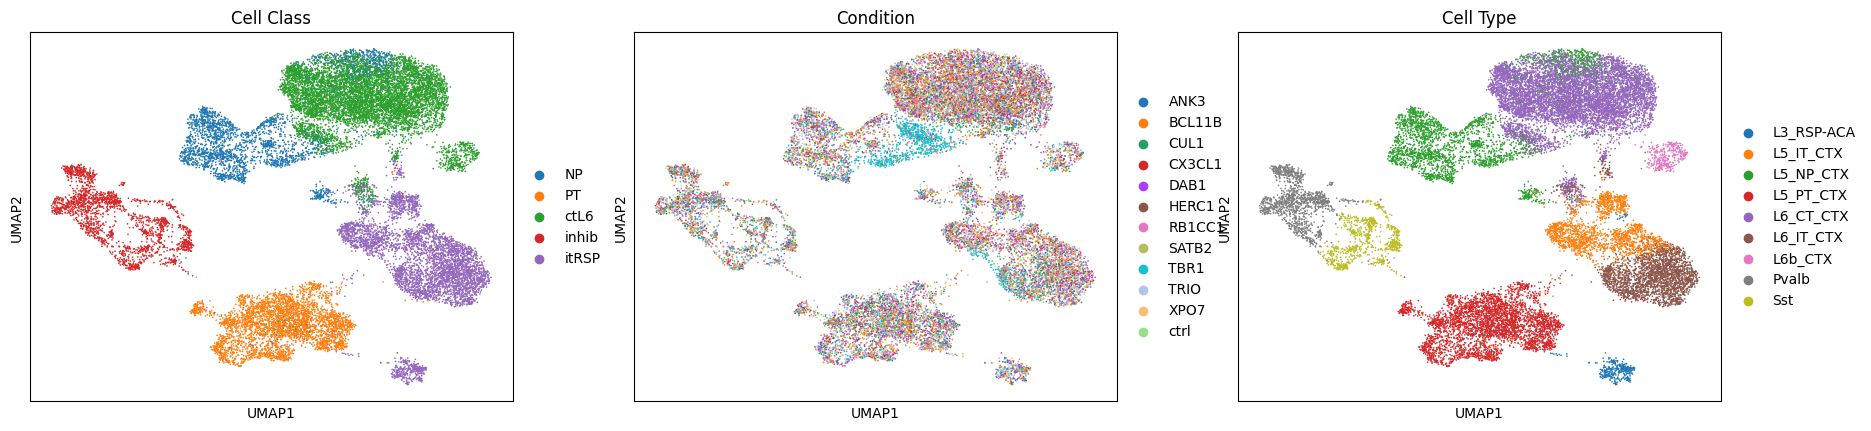

In [9]:
sc.pl.umap(boli, color = ["cell_class", "condition", "cell_type"], title = ["Cell Class", "Condition", "Cell Type"])

In [17]:
print(boli.obs.groupby(["condition", "cell_class"]).size())

condition  cell_class
ANK3       NP             114
           PT             165
           ctL6           489
           inhib          118
           itRSP          283
BCL11B     NP             417
           PT             522
           ctL6          1380
           inhib          398
           itRSP          829
CUL1       NP              91
           PT             144
           ctL6           405
           inhib           96
           itRSP          223
CX3CL1     NP              98
           PT             215
           ctL6           374
           inhib           78
           itRSP          183
DAB1       NP             327
           PT             430
           ctL6          1068
           inhib          248
           itRSP          614
HERC1      NP             162
           PT             267
           ctL6           602
           inhib          165
           itRSP          266
RB1CC1     NP             190
           PT             319
           ctL6   

/tmp/ipykernel_12825/731351896.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(boli.obs.groupby(["condition", "cell_class"]).size())


In [20]:
rename_map = {
    "L6_CT_CTX": "ctL6",
    "L6b_CTX": "ctL6",
    "L5_PT_CTX": "PT", 
    "L5_NP_CTX": "NP",
    "L3_RSP-ACA": "itRSP",
    "L4_5_IT_CTX": "itRSP",
    "L2_3_IT_CTX-1": "itRSP",
    "L6_IT_CTX": "itRSP",
    "L5_IT_CTX": "itRSP",
    "L2_3_IT_PPP": "itRSP",
    "L2_3_IT_CTX-2": "itRSP",
    "Sst": "inhib",
    "Pvalb": "inhib",
}

boli.obs["cell_class"] = boli.obs["cell_type"].map(rename_map)


In [18]:
boli.obs["cell_type"] = boli.obs["cell_type"].str.replace(" ", "_")

In [22]:
boli_clean = boli[boli.obs["cell_class"].notna()]


In [23]:
boli.obs["cell_class"].value_counts()

cell_class
ctL6     8227
itRSP    4853
PT       3710
NP       2755
inhib    2155
Name: count, dtype: int64

In [19]:
boli.obs["cell_type"].value_counts()

cell_type
L6_CT_CTX        7860
L4/5_IT_CTX      3761
L5_PT_CTX        3710
L2/3_IT_CTX-1    3122
L5_NP_CTX        2755
L6_IT_CTX        2544
L5_IT_CTX        1939
CT_SUB           1689
Pvalb            1317
L2/3_IT_CTX-2    1120
Sst               838
NP_SUB            468
L3_RSP-ACA        370
L6b_CTX           367
L2/3_IT_PPP       356
L5_IT_TPE-ENT     172
L5_PPP            155
Vip               116
Lamp5             111
Oligo              52
Sncg               51
SUB-ProS           33
Car3               30
Astro              29
NP_PPP             26
CR                 14
Micro-PVM           9
L2_IT_RHP           7
Endo                6
SMC-Peri            5
VLMC                2
V3d                 1
L6_IT_ENTl          1
L6b/CT_ENT          1
L2_IT_ENTl          1
Name: count, dtype: int64

In [15]:
boli.obs["cell_type"] = boli.obs["predicted.subclass"]

In [9]:
boli.obs["condition"].value_counts()

condition
BCL11B+ctrl    3546
TRIO+ctrl      2816
DAB1+ctrl      2687
TBR1+ctrl      2132
ctrl           1781
RB1CC1+ctrl    1616
SATB2+ctrl     1543
HERC1+ctrl     1462
ANK3+ctrl      1169
XPO7+ctrl      1041
CUL1+ctrl       959
CX3CL1+ctrl     948
Name: count, dtype: int64

In [10]:
boli.obs["condition"] = boli.obs["condition"].str.replace("+ctrl", "")

In [11]:
boli.obs["condition"].value_counts()

condition
BCL11B    3546
TRIO      2816
DAB1      2687
TBR1      2132
ctrl      1781
RB1CC1    1616
SATB2     1543
HERC1     1462
ANK3      1169
XPO7      1041
CUL1       959
CX3CL1     948
Name: count, dtype: int64

In [12]:
boli.write("boli_ctx_scprocess_no+ctrl.h5ad")

In [8]:
boli.obs["cell_class"].value_counts()

cell_class
ctL6     8227
itRSP    4853
PT       3710
NP       2755
inhib    2155
Name: count, dtype: int64

In [24]:
# Count cells per condition
counts = boli.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 11
Mean cells per condition: 2754.818181818182
Median cells per condition: 2320.0
Min cells in a condition: 1297
Max cells in a condition: 5367


In [5]:
import numpy as np

In [6]:
after = np.array(boli.X.sum(axis=1)).flatten()


In [7]:
print("\nPer-cell total counts (after):")
print("min =", after.min(), " median =", np.median(after), " max =", after.max())


Per-cell total counts (after):
min = 170.11923  median = 473.32745  max = 805.77905


# Adamson

In [4]:
adamson = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/adamson.h5ad')
adamson

AnnData object with n_obs × n_vars = 68603 × 5060
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'

In [10]:
after = np.array(adamson.X.sum(axis=1)).flatten()
print("\nPer-cell total counts (after):")
print("min =", after.min(), " median =", np.median(after), " max =", after.max())


Per-cell total counts (after):
min = 453.2576  median = 1271.2089  max = 1869.749


In [11]:
adamson.obs["condition"].unique()

['CREB1+ctrl', 'ctrl', 'ZNF326+ctrl', 'BHLHE40+ctrl', 'DDIT3+ctrl', ..., 'CARS+ctrl', 'TMED2+ctrl', 'P4HB+ctrl', 'SPCS3+ctrl', 'SPCS2+ctrl']
Length: 87
Categories (88, object): ['AARS+ctrl', 'AMIGO3+ctrl', 'ARHGAP22+ctrl', 'ASCC3+ctrl', ..., 'XRN1+ctrl', 'YIPF5+ctrl', 'ZNF326+ctrl', 'ctrl']

In [7]:
# Count cells per condition
counts = adamson.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 87
Mean cells per condition: 509.6551724137931
Median cells per condition: 504.0
Min cells in a condition: 0
Max cells in a condition: 1267


In [50]:
pert_counts = adamson.obs["condition"].value_counts()
pert_counts = pert_counts.reset_index()
pert_counts.columns = ["perturbation", "n_cells"]

target_n = 7000
k = 11

# Sort perturbations randomly to avoid bias
pert_counts = pert_counts.sample(frac=1, random_state=42).reset_index(drop=True)

# Try all combinations is infeasible (>thousands of perts), so greedy heuristic:
chosen = []
total = 0
for _, row in pert_counts.iterrows():
    if len(chosen) < k and total + row["n_cells"] <= target_n:
        chosen.append(row["perturbation"])
        total += row["n_cells"]

print("Chosen perts:", chosen)
print("Total cells:", total)

Chosen perts: ['CARS+ctrl', 'ZNF326+ctrl', 'SEL1L+ctrl', 'BHLHE40+ctrl', 'MRGBP+ctrl', 'SLC39A7+ctrl', 'SOCS1+ctrl', 'SRPR+ctrl', 'DNAJC19+ctrl', 'UFL1+ctrl', 'TIMM44+ctrl']
Total cells: 5135


In [52]:
import numpy as np
import pandas as pd

def select_perturbations_greedy(adata, target_n, k=11, obs_key="condition", random_state=42):
    """
    Select k perturbations whose total cell count is as close as possible to target_n
    using a simple greedy heuristic (under target first, then fill to k with smallest left).

    Parameters
    ----------
    adata : AnnData
        Your dataset; counts per perturbation taken from adata.obs[obs_key].
    target_n : int
        Desired total number of cells across the selected perturbations.
    k : int, default 11
        Number of perturbations to select.
    obs_key : str, default "condition"
        obs column that encodes the perturbation label.
    random_state : int
        Shuffles the order to avoid bias among ties.

    Returns
    -------
    chosen : list[str]
        Selected perturbation labels (length k).
    total_cells : int
        Sum of cells across the chosen perturbations.
    counts_df : pd.DataFrame
        DataFrame with columns ['perturbation','n_cells'] (shuffled order used).
    """
    # counts per perturbation
    counts = adata.obs[obs_key].value_counts()
    counts_df = counts.reset_index()
    counts_df.columns = ["perturbation", "n_cells"]

    # shuffle to avoid systematic bias
    counts_df = counts_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    chosen = []
    total = 0

    # pass 1: add while staying <= target
    for _, row in counts_df.iterrows():
        if len(chosen) >= k:
            break
        if total + row["n_cells"] <= target_n:
            chosen.append(row["perturbation"])
            total += row["n_cells"]

    # pass 2: if we still need more, add smallest remaining (may exceed target)
    if len(chosen) < k:
        remaining = counts_df[~counts_df["perturbation"].isin(chosen)].sort_values("n_cells")
        for _, row in remaining.iterrows():
            if len(chosen) >= k:
                break
            chosen.append(row["perturbation"])
            total += row["n_cells"]

    return chosen, int(total), counts_df

In [53]:
select_perturbations_greedy(adamson,7000)

(['AARS+ctrl',
  'EIF2B4+ctrl',
  'SYVN1+ctrl',
  'XRN1+ctrl',
  'KCTD16+ctrl',
  'TARS+ctrl',
  'MRPL39+ctrl',
  'HSPA5+ctrl',
  'CHERP+ctrl',
  'PPWD1+ctrl',
  'EIF2S1+ctrl'],
 5748,
    perturbation  n_cells
 0     AARS+ctrl      360
 1          ctrl    24263
 2   EIF2B4+ctrl      545
 3    SYVN1+ctrl      553
 4     XRN1+ctrl      621
 ..          ...      ...
 83   TELO2+ctrl      562
 84   HYOU1+ctrl      432
 85   STT3A+ctrl      391
 86  AMIGO3+ctrl      616
 87    P4HB+ctrl      471
 
 [88 rows x 2 columns])

# Dixit

In [9]:
dixit = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/dixit.h5ad')
dixit

AnnData object with n_obs × n_vars = 44735 × 5012
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [10]:
# Count cells per condition
counts = dixit.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 19
Mean cells per condition: 1720.6842105263158
Median cells per condition: 1489.0
Min cells in a condition: 322
Max cells in a condition: 4721


In [12]:
dixit.obs["condition"].unique()

['CREB1+ctrl', 'GABPA+ctrl', 'IRF1+ctrl', 'ELK1+ctrl', 'ctrl', ..., 'AURKC+ctrl', 'AURKA+ctrl', 'AURKB+ctrl', 'TOR1AIP1+ctrl', 'RACGAP1+ctrl']
Length: 20
Categories (20, object): ['AURKA+ctrl', 'AURKB+ctrl', 'AURKC+ctrl', 'CENPE+ctrl', ..., 'RACGAP1+ctrl', 'TOR1AIP1+ctrl', 'YY1+ctrl', 'ctrl']

# Norman

In [11]:
norman = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/norman.h5ad')
norman

AnnData object with n_obs × n_vars = 91205 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [16]:
single_mask = norman.obs["condition"].str.contains(r"\+ctrl$")
norman_single = norman[single_mask].copy()


In [17]:
norman_single

AnnData object with n_obs × n_vars = 33611 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [18]:
# Count cells per condition
counts = norman_single.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 104
Mean cells per condition: 323.1826923076923
Median cells per condition: 291.0
Min cells in a condition: 97
Max cells in a condition: 997


In [13]:
norman.obs["condition"].unique()

['TSC22D1+ctrl', 'KLF1+MAP2K6', 'ctrl', 'CEBPE+RUNX1T1', 'MAML2+ctrl', ..., 'STIL+ctrl', 'CDKN1C+ctrl', 'ctrl+CDKN1B', 'CDKN1B+CDKN1A', 'C3orf72+FOXL2']
Length: 284
Categories (284, object): ['AHR+FEV', 'AHR+KLF1', 'AHR+ctrl', 'ARID1A+ctrl', ..., 'ZC3HAV1+HOXC13', 'ZC3HAV1+ctrl', 'ZNF318+FOXL2', 'ZNF318+ctrl']

# Replogle k562 Essential

In [14]:
k562 = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/replogle_k562_essential.h5ad')
k562

AnnData object with n_obs × n_vars = 162751 × 5000
    obs: 'condition', 'cell_type', 'cov_drug_dose_name', 'dose_val', 'control', 'condition_name'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'

In [15]:
# Count cells per condition
counts = k562.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 1092
Mean cells per condition: 139.24908424908426
Median cells per condition: 115.0
Min cells in a condition: 15
Max cells in a condition: 765


In [14]:
k562.obs["condition"].unique()

['UBL5+ctrl', 'TIMM9+ctrl', 'SMG5+ctrl', 'MED9+ctrl', 'MED1+ctrl', ..., 'PSMB2+ctrl', 'BMS1+ctrl', 'BUD31+ctrl', 'SNRPC+ctrl', 'RPS2+ctrl']
Length: 1093
Categories (1093, object): ['AAMP+ctrl', 'AARS+ctrl', 'AATF+ctrl', 'ABCB7+ctrl', ..., 'ZNF574+ctrl', 'ZNHIT6+ctrl', 'ZNRD1+ctrl', 'ctrl']

# Replogle rpe1 Essential

In [20]:
rpe1 = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/replogle_rpe1_essential.h5ad')
rpe1

AnnData object with n_obs × n_vars = 162733 × 5000
    obs: 'condition', 'cell_type', 'cov_drug_dose_name', 'dose_val', 'control', 'condition_name'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'

In [21]:
# Count cells per condition
counts = rpe1.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 1543
Mean cells per condition: 98.02203499675956
Median cells per condition: 66.0
Min cells in a condition: 13
Max cells in a condition: 3458


In [15]:
rpe1.obs["condition"].unique()

['SRCAP+ctrl', 'RRP12+ctrl', 'NOMO3+ctrl', 'ACTB+ctrl', 'SETD5+ctrl', ..., 'CPEB1+ctrl', 'CTPS1+ctrl', 'TAF10+ctrl', 'CLSPN+ctrl', 'POLE+ctrl']
Length: 1544
Categories (1544, object): ['AARS+ctrl', 'AASDHPPT+ctrl', 'AATF+ctrl', 'ABCB7+ctrl', ..., 'ZRSR2+ctrl', 'ZW10+ctrl', 'ZWINT+ctrl', 'ctrl']